[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://tinyurl.com/2a9j8rnk)

# Métricas de Clasificación

En este notebook, exploraremos el uso de métricas de clasificación en dos escenarios diferentes: uno con un dataset balanceado y otro con un **dataset desbalanceado**. A través de estos ejemplos, se ilustrará cómo las métricas comunes de clasificación pueden ayudar a evaluar el rendimiento de modelos en diferentes contextos.

El objetivo principal es proporcionar una comprensión clara de cómo interpretar estas métricas, destacando la importancia de elegir las métricas adecuadas según la naturaleza del problema y la distribución de las clases. Se presentarán las siguientes métricas:

- Matriz de Confusión
- Precisión (Accuracy)
- Precisión (Precision)
- Recall
- F1-Score

Además, analizaremos cómo los modelos de clasificación pueden comportarse de manera diferente dependiendo de si los datos están balanceados o desbalanceados, y cómo estas métricas pueden revelar aspectos importantes del rendimiento del modelo que no siempre son evidentes con una sola métrica. Al final de este notebook, se espera que puedas interpretar y aplicar correctamente estas métricas para tomar decisiones informadas sobre la calidad de un modelo de clasificación.

**Nota**: Este notebook se enfocará en el dataset desbalanceado.

In [1]:
# Esta celda es una práctica estándar para la configuración del entorno.
# Su objetivo es detectar si el notebook se está ejecutando en el entorno de nube
# de Google Colab o en un entorno local (como Jupyter en una máquina personal).
# Esto permite que el script ajuste automáticamente las rutas de los archivos
# y los comandos de instalación (como !wget) según sea necesario.

# verificar si estamos en google colab
try:
    # Inicia un bloque 'try' para intentar ejecutar un código que podría fallar.
    import google.colab

    # Si la importación tiene éxito, significa que estamos en Google Colab.
    # Se crea una variable booleana 'IN_COLAB' y se establece en True.
    IN_COLAB = True

except:
    # Si el bloque 'try' falla (genera un ImportError), significa que el módulo
    # 'google.colab' no existe y, por lo tanto, no estamos en Colab.
    # La variable 'IN_COLAB' se establece en False.
    IN_COLAB = False

In [2]:
# Importación de bibliotecas estándar.
# El módulo 'os' (Operating System) proporciona funciones para interactuar
# con el sistema operativo, como crear, leer o verificar rutas de archivos.
# Es esencial para que el notebook sea "agnóstico" al sistema operativo
# (es decir, funcione en Windows, macOS o Linux).

# Importa el módulo 'os'
import os

In [3]:
# Verifica si el entorno de ejecución es Google Colab.
if IN_COLAB:
    # Descarga una carpeta desde un repositorio de GitHub.

    # Comprueba si la carpeta 'datasets_github' NO existe en el directorio actual.
    if not os.path.exists('datasets_github'):
        # Descarga el archivo ZIP del repositorio de GitHub de forma silenciosa (-q)
        # y lo guarda como 'repositorio.zip' (-O).
        !wget -q -O repositorio.zip https://github.com/ingrafaeln/Ciencia-de-Datos/archive/refs/heads/main.zip

        # Descomprime el archivo 'repositorio.zip' de forma silenciosa (-q).
        !unzip -q repositorio.zip

        # Mueve la carpeta específica 'dataset_sintetico' desde la estructura descomprimida
        # a una nueva carpeta llamada 'datasets_github' en el directorio raíz de Colab.
        !mv /content/Ciencia-de-Datos-main/Seccion_3/dataset_sintetico datasets_github

        # Mueve el archivo 'datasetanalyser.py' desde la estructura descomprimida
        # al directorio raíz de Colab.
        !mv /content/Ciencia-de-Datos-main/Seccion_3/datasetanalyser.py datasetanalyser.py

        # Elimina el archivo ZIP descargado y la carpeta principal descomprimida
        # que ya no se necesitan, para limpiar el espacio de trabajo.
        !rm -rf repositorio.zip Ciencia-de-Datos-main

        # Imprime un mensaje de confirmación.
        print("Archivos descargados y extraídos correctamente.")

    # Si la carpeta 'datasets_github' YA existe...
    else:
        # Imprime un mensaje indicando que no se necesita descargar nada.
        print("Archivos ya descargados y extraídos.")

Archivos ya descargados y extraídos.


In [4]:
# Definición de la ruta de acceso local. Este es el "camino" alternativo
# que usará el script si detecta que NO está en Google Colab.

# os.getcwd() obtiene la ruta del directorio de trabajo actual (donde se ejecuta el notebook).
# os.path.join() construye una ruta de archivo compatible con cualquier sistema operativo.
# Esto es crucial para la portabilidad del código.
dataset_sintetico_path = os.path.join(os.getcwd(), 'dataset_sintetico')

# 1. Análisis de los Datos

## 1.1. Cargar los Datos

Una clínica que desea predecir la gravedad de la diabetes en pacientes basándose en ciertas características médicas. La clasificación se realiza en tres niveles de gravedad:

- Sin Diabetes (Clase 0)
- Diabetes Moderada (Clase 1)
- Diabetes Severa (Clase 2)

La mayoría de los pacientes que visitan la clínica no tienen diabetes, mientras que hay un número menor que presenta síntomas moderados y un grupo aún más reducido que tiene casos severos. Esto crea un dataset desbalanceado, ya que las clases no están distribuidas equitativamente.

**Atributos del dataset:**

- Edad:
  - Tipo: Numérica continua
  - Descripción: Representa la edad del paciente en años. La diabetes se correlaciona a menudo con la edad, por lo que esta característica puede ayudar a predecir la condición.

- Índice de Masa Corporal (IMC):
  - Tipo: Numérica continua
  - Descripción: Calcula el peso del paciente en relación con su altura. Un IMC elevado puede ser un factor de riesgo significativo para la diabetes.

- Glucosa en Ayunas:
  - Tipo: Numérica continua
  - Descripción: Medición de la glucosa en la sangre después de un período de ayuno. Niveles altos pueden indicar problemas de azúcar en la sangre.

- Historial Familiar:
  - Tipo: Numérica discreta
  - Descripción: Número de familiares directos que han sido diagnosticados con diabetes. Tener antecedentes familiares puede aumentar el riesgo.

- Nivel de Actividad Física:
  - Tipo: Numérica continua (valor entre 0 y 1)
  - Descripción: Un puntaje que mide la actividad física del paciente (0 = sedentario, 1 = muy activo). La actividad física regular puede ayudar a reducir el riesgo de diabetes.


- Variable Objetivo
  - Gravedad_Diabetes:
    - Tipo: Categórica (0, 1, 2)
  - Descripción: Variable objetivo que indica la gravedad de la condición del paciente:
    - 0 = Sin Diabetes
    - 1 = Diabetes Moderada
    - 2 = Diabetes Severa

In [5]:
# Importa la biblioteca pandas y la renombra como 'pd' (una convención estándar).
import pandas as pd

# Define la ruta de la carpeta del dataset.
# Utiliza un operador ternario: si IN_COLAB es True, usa la ruta de Colab; si no, usa la ruta local.
datasets_folder_name = '/content/datasets_github' if IN_COLAB else dataset_sintetico_path

# Construye la ruta completa al archivo CSV específico.
ruta_dataset = os.path.join(datasets_folder_name, 'dataset_2_gravedad_diabetes_sintetico_.csv')

# Carga el archivo CSV en un DataFrame de pandas llamado 'df1_diabetes'.
df1_diabetes = pd.read_csv(ruta_dataset)

# Muestra las primeras 5 filas del DataFrame para una inspección inicial.
df1_diabetes.head()

,Edad,IMC,Glucosa_Ayunas,Historial_Familiar,Nivel_Actividad,Gravedad_Diabetes
0,29,27.5,131,0,1.00,1
1,47,23.1,101,0,1.00,0
2,46,24.4,106,0,0.59,0
3,36,21.9,93,0,1.00,2
4,57,32.5,97,2,1.00,0


## 1.2. Explorar los Datos

Realiza un análisis exploratorio inicial para entender la estructura y el contenido del dataset. Esto incluye revisar el tipo de datos, el número de entradas, y estadísticas básicas para cada variable.

### Paso 1.3: Comprobar Datos Faltantes o Anómalos
Verifica si hay valores faltantes y observa si hay valores fuera de los rangos esperados. Esto ayudará a identificar datos que necesiten limpieza o ajustes.

### Paso 1.4: Análisis Univariado
Examina cada característica por separado para entender su distribución. Utiliza histogramas y diagramas de caja para visualizar la variabilidad de cada característica.

### Paso 1.5: Análisis Bivariado
Examina cómo se relacionan las características con la variable objetivo `Gravedad_Diabetes`. Utiliza diagramas de dispersión y gráficos de violín para visualizar relaciones y patrones entre variables.

### Paso 1.6: Análisis de Correlación
Verifica las correlaciones entre las características para identificar posibles relaciones que puedan ser importantes en el análisis. Esto puede ayudar a reducir la multicolinealidad y seleccionar las características más relevantes.

### Paso 1.7: Conclusiones Iniciales del Análisis
Resume los hallazgos clave de la exploración de los datos. Identifica características que distingan claramente los diferentes niveles de interés y patrones generales que podrías aprovechar en el modelado predictivo.

### Paso 1.8: Visualizaciones Adicionales para Insights
Crea visualizaciones adicionales si observaste patrones interesantes que merecen ser destacados. Estas visualizaciones pueden ayudar a comunicar mejor los resultados del análisis y proporcionar insights más profundos.

In [6]:
## 1.2. Exploración de los datos

# Imprime un resumen conciso del DataFrame.
# Esto incluye el número de entradas, el índice, las columnas, los tipos de datos (Dtype) y el uso de memoria.
# Es útil para verificar tipos de datos incorrectos o valores faltantes (Non-Null Count).
df1_diabetes.info()

# Genera estadísticas descriptivas para las columnas numéricas.
# Muestra el conteo (count), media (mean), desviación estándar (std), mínimo (min),
# cuartiles (25%, 50%, 75%) y máximo (max).
df1_diabetes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Edad                2000 non-null   int64  
 1   IMC                 2000 non-null   float64
 2   Glucosa_Ayunas      2000 non-null   int64  
 3   Historial_Familiar  2000 non-null   int64  
 4   Nivel_Actividad     2000 non-null   float64
 5   Gravedad_Diabetes   2000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 93.9 KB


,Edad,IMC,Glucosa_Ayunas,Historial_Familiar,Nivel_Actividad,Gravedad_Diabetes
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,43.338000,27.630450,109.208500,1.145500,0.532215,0.408500
std,11.736167,5.081063,20.139832,0.847165,0.415054,0.671456
min,18.000000,15.000000,70.000000,0.000000,0.000000,0.000000
25%,33.000000,24.600000,95.000000,0.000000,0.000000,0.000000
50%,41.000000,28.100000,109.000000,1.000000,0.590000,0.000000
75%,54.000000,31.200000,123.000000,2.000000,1.000000,1.000000
max,80.000000,39.800000,175.000000,2.000000,1.000000,2.000000


In [7]:
# Cuenta la frecuencia de cada valor único en la columna 'Gravedad_Diabetes'.
# Esto es fundamental para identificar si el dataset está balanceado o, como en este caso, desbalanceado.
df1_diabetes['Gravedad_Diabetes'].value_counts()

,count
Gravedad_Diabetes,
0,1392
1,399
2,209


**Conclusión**

- Se observa que todos los atributos son de tipo numérico y no hay valores faltantes en el dataset.
- Las variables se encuentran en diferentes rangos, por lo que normalizarlas puede ser útil para el modelado.
- Existen 5 variables predictoras y una variable objetivo con 3 clases.
- Las clases de la variable objetivo están desbalanceadas, con la clase 0 siendo la más común y la clase 2 la menos común.

## 1.3: Comprobar Datos Faltantes o Anómalos
Verifica si hay valores faltantes y observa si hay valores fuera de los rangos esperados. Esto ayudará a identificar datos que necesiten limpieza o ajustes.


In [8]:
# Importa la clase 'DatasetAnalyzer' desde el archivo 'datasetanalyser.py'
# que se descargó y movió en la Celda 5.
from datasetanalyser import DatasetAnalyzer

In [9]:
# Crea una instancia (un objeto) de la clase DatasetAnalyzer.
# Se le pasa el DataFrame 'df1_diabetes' al constructor de la clase.
analyzer = DatasetAnalyzer(df1_diabetes)

In [10]:
# Llama al método 'check_missing_and_anomalies' del objeto 'analyzer'.
# Esta función personalizada (definida en datasetanalyser.py) probablemente
# imprime la suma de valores nulos por columna y busca otras anomalías, como valores negativos.
analyzer.check_missing_and_anomalies()

Valores faltantes por columna:
Edad                  0
IMC                   0
Glucosa_Ayunas        0
Historial_Familiar    0
Nivel_Actividad       0
Gravedad_Diabetes     0
dtype: int64

Valores negativos detectados en columnas numéricas:


No se encontraron valores faltantes en el dataset, lo que es un buen indicador de la calidad de los datos.

## 1.4: Análisis Univariado

Examina cada característica por separado para entender su distribución. Utiliza histogramas y diagramas de caja para visualizar la variabilidad de cada característica.

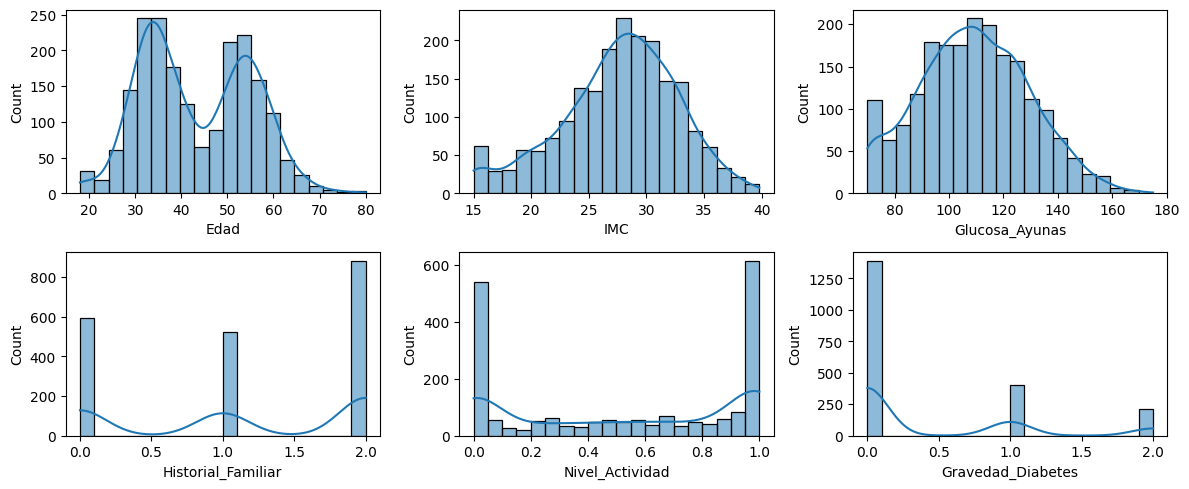

In [11]:
# Llama al método 'univariate_analysis' del objeto 'analyzer'.
# Este método personalizado genera visualizaciones para cada columna.
# 'plot_type='histogram'' especifica que queremos ver histogramas,
# que son útiles para entender la distribución (frecuencia) de cada variable.
# 'fig_size' ajusta el tamaño de la figura que contendrá los gráficos.
analyzer.univariate_analysis(plot_type='histogram', fig_size=(12, 5))

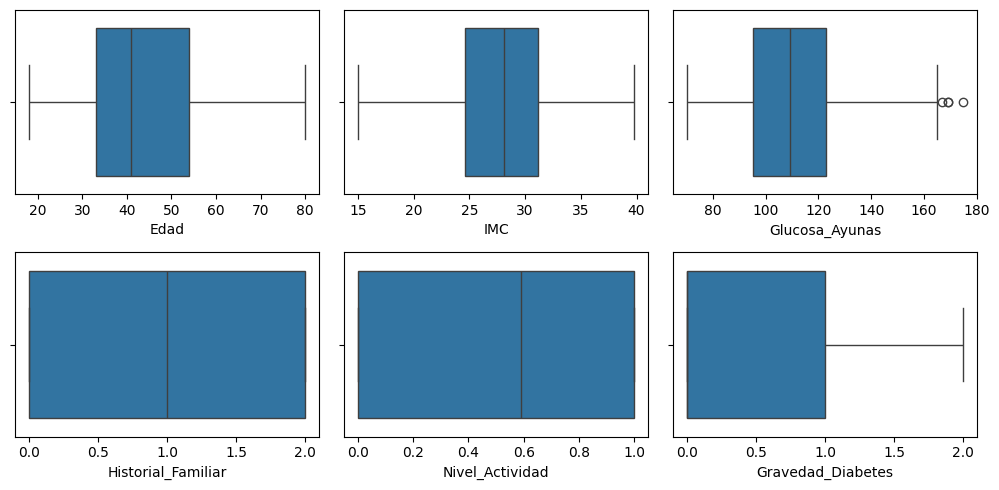

In [12]:
# Llama al mismo método 'univariate_analysis' pero esta vez pidiendo 'boxplot'.
# Los diagramas de caja (boxplots) son excelentes para visualizar la mediana,
# los cuartiles y, especialmente, para identificar valores atípicos (outliers).
analyzer.univariate_analysis(plot_type='boxplot', fig_size=(10, 5))

**Conclusiones Generales del Análisis Univariado**

Aquí tienes el análisis univariado de las variables presentadas en las imágenes, siguiendo el estilo solicitado:

**Conclusiones del Análisis Univariado**

1.  **Edad**
    * **Histograma**: La distribución es **bimodal**, mostrando dos picos de frecuencia claros. El primer pico se sitúa alrededor de los **35-40 años** y el segundo, ligeramente más alto, cerca de los **50-55 años**. Esto sugiere dos grupos de edad predominantes en el conjunto de datos.
    * **Boxplot**: No se observan valores atípicos. La mediana está aproximadamente en **43 años**, y el 50% central de los datos (la caja) se encuentra entre los **33 y 54 años**.

2.  **IMC (Índice de Masa Corporal)**
    * **Histograma**: La distribución es **unimodal y se asemeja a una distribución normal**, aunque con un ligero sesgo positivo (cola a la derecha). La mayoría de los valores se concentran entre **25 y 35**, con el pico más alto alrededor de **28-30**.
    * **Boxplot**: Confirma la distribución simétrica. La mediana está cerca de **28**, y no se identifican valores atípicos significativos.

3.  **Glucosa\_Ayunas**
    * **Histograma**: La distribución presenta un **sesgo positivo (a la derecha)**. La mayoría de los pacientes tienen valores concentrados en el rango de **90 a 120**, con una cola que se extiende hacia valores más altos.
    * **Boxplot**: Muestra la mediana alrededor de **109**. Se observan varios **valores atípicos** claros en el extremo superior (por encima de 160), indicando algunos pacientes con niveles de glucosa notablemente altos.

4.  **Historial\_Familiar**
    * **Histograma**: Esta es una variable **discreta** con tres valores: **0, 1, y 2**. El valor **2** es el más frecuente (aprox. 850), seguido por el **0** (aprox. 600) y el **1** (aprox. 500).
    * **Boxplot**: Muestra que la mediana de los valores es **1.0**. El rango intercuartílico (la caja) va de 0 a 2, cubriendo todas las categorías. No hay valores atípicos.

5.  **Nivel\_Actividad**
    * **Histograma**: Muestra una distribución en **forma de U (bimodal)**, lo que indica una polarización. Las frecuencias más altas están en los extremos **0.0** (sedentario) y **1.0** (muy activo), con muy pocos pacientes en los niveles intermedios.
    * **Boxplot**: La mediana se ubica cerca de **0.6**, pero la caja es muy ancha (de 0.0 a 1.0), lo que confirma que los datos están distribuidos en los extremos y no concentrados en el centro.

6.  **Gravedad\_Diabetes**
    * **Histograma**: Esta variable (la objetivo) está **altamente desbalanceada**. La categoría **0** (Sin Diabetes) es, con diferencia, la más numerosa. La categoría **1** (Moderada) es la siguiente, y la categoría **2** (Severa) es la menos frecuente.
    * **Boxplot**: Refleja este desbalance. La mediana y el 25º percentil se encuentran en **0.0**, mientras que el 75º percentil está en **1.0**.



## 1.5: Análisis Bivariado
Examina cómo se relacionan las características con la variable objetivo `Nivel_Interes`. Utiliza diagramas de dispersión y gráficos de violín para visualizar relaciones y patrones entre variables.

In [13]:
df1_diabetes

,Edad,IMC,Glucosa_Ayunas,Historial_Familiar,Nivel_Actividad,Gravedad_Diabetes
0,29,27.5,131,0,1.00,1
1,47,23.1,101,0,1.00,0
2,46,24.4,106,0,0.59,0
3,36,21.9,93,0,1.00,2
4,57,32.5,97,2,1.00,0
...,...,...,...,...,...,...
1995,35,19.0,70,2,0.00,2
1996,26,37.3,109,2,0.68,0
1997,34,28.8,102,0,0.29,0
1998,35,26.9,140,0,0.00,0


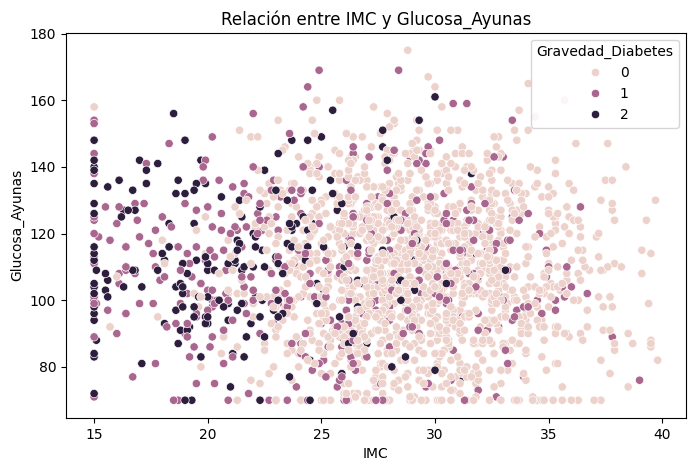

In [14]:
# Análisis Bivariado (Característica vs. Característica por Objetivo).
# Se utiliza un gráfico de dispersión (scatter plot) para visualizar la
# relación entre dos variables numéricas.
# El argumento 'hue' (matiz) es clave, ya que colorea cada punto según su
# clase objetivo, permitiéndonos buscar patrones o cúmulos (clusters)
# específicos de cada clase.
analyzer.bivariate_analysis("IMC", "Glucosa_Ayunas", hue="Gravedad_Diabetes", plot_type='scatter')

Este gráfico de dispersión ilustra la **Relación entre IMC y Glucosa\_Ayunas**, con puntos coloreados según la **Gravedad\_Diabetes**.

1.  **Clase 0 (Sin Diabetes - Rosa Claro):** Estos pacientes (la clase mayoritaria) se concentran principalmente en niveles de glucosa en ayunas por debajo de 130. Se distribuyen en todo el rango de IMC, pero son notablemente dominantes en pacientes con IMC alto (aproximadamente > 27).

2.  **Clase 1 (Diabetes Moderada - Rosa Oscuro) y Clase 2 (Diabetes Severa - Negro):** Estas dos clases (las clases minoritarias) están muy superpuestas entre sí. Se encuentran en todo el rango de glucosa, pero son más predominantes en niveles de glucosa altos (> 120). Curiosamente, ambas clases son mucho más frecuentes en pacientes con IMC bajo (aproximadamente < 27).

**Conclusiones Generales:**

* **Sin Separación Lineal Clara:** Las clases están muy superpuestas, lo que indica que solo estas dos variables no son suficientes para separar perfectamente los grupos.
* **Relación No Intuitiva del IMC:** A diferencia de lo que se podría esperar, un IMC alto en este conjunto de datos está fuertemente asociado con la Clase 0 (Sin Diabetes). Por el contrario, un IMC bajo no indica "salud", ya que las clases 1 y 2 (Moderada y Severa) tienen una presencia significativa en este rango.
* **Importancia de la Glucosa:** Niveles altos de Glucosa\_Ayunas (por encima de 130-140) son indicadores casi exclusivos de las clases 1 y 2, mostrando su relevancia para predecir la gravedad.

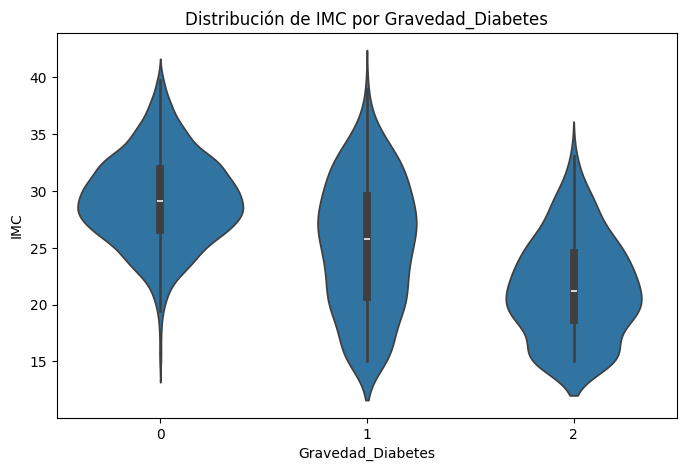

In [15]:
# Análisis Bivariado (Característica Numérica vs. Objetivo Categórico).
# Se utiliza un gráfico de violín (violin plot) para comparar la distribución
# de una variable numérica entre las diferentes categorías
# de la variable objetivo. Este gráfico combina un boxplot
# (que muestra los cuartiles) con un gráfico de densidad (KDE), lo que
# revela la forma de la distribución en cada categoría.

analyzer.bivariate_analysis("Gravedad_Diabetes", "IMC", plot_type='violin')

Este gráfico de violín muestra la **Distribución del IMC por Gravedad\_Diabetes**.

1.  **Clase 0 (Sin Diabetes):** Esta clase tiene la distribución de IMC más amplia de las three. La forma es ancha, indicando una gran variabilidad de pacientes. El pico de densidad (la parte más ancha del violín) está en un IMC más alto, alrededor de 28-30.
2.  **Clase 1 (Diabetes Moderada):** La distribución es más estrecha que la Clase 0, pero aún muestra una variabilidad considerable. El pico de densidad es similar al de la Clase 0, quizás ligeramente más bajo.
3.  **Clase 2 (Diabetes Severa):** Esta clase tiene la distribución de IMC más estrecha y concentrada. El pico de densidad está notablemente más bajo que en las otras dos clases, centrado alrededor de un IMC de 21-23.

**Conclusiones Generales:**

* **Diferenciación de Clases:** El IMC por sí solo no separa claramente las Clases 0 y 1, ya que sus distribuciones se superponen mucho.
* **Patrón de la Clase 2:** La Clase 2 (Severa) muestra una tendencia clara a tener valores de IMC más bajos y menos dispersos en comparación con las otras dos clases.
* **Confirmación:** Esto refuerza lo observado en el gráfico de dispersión: un IMC bajo no excluye la diabetes en este dataset, y de hecho, está más asociado con la categoría "Severa" (Clase 2).

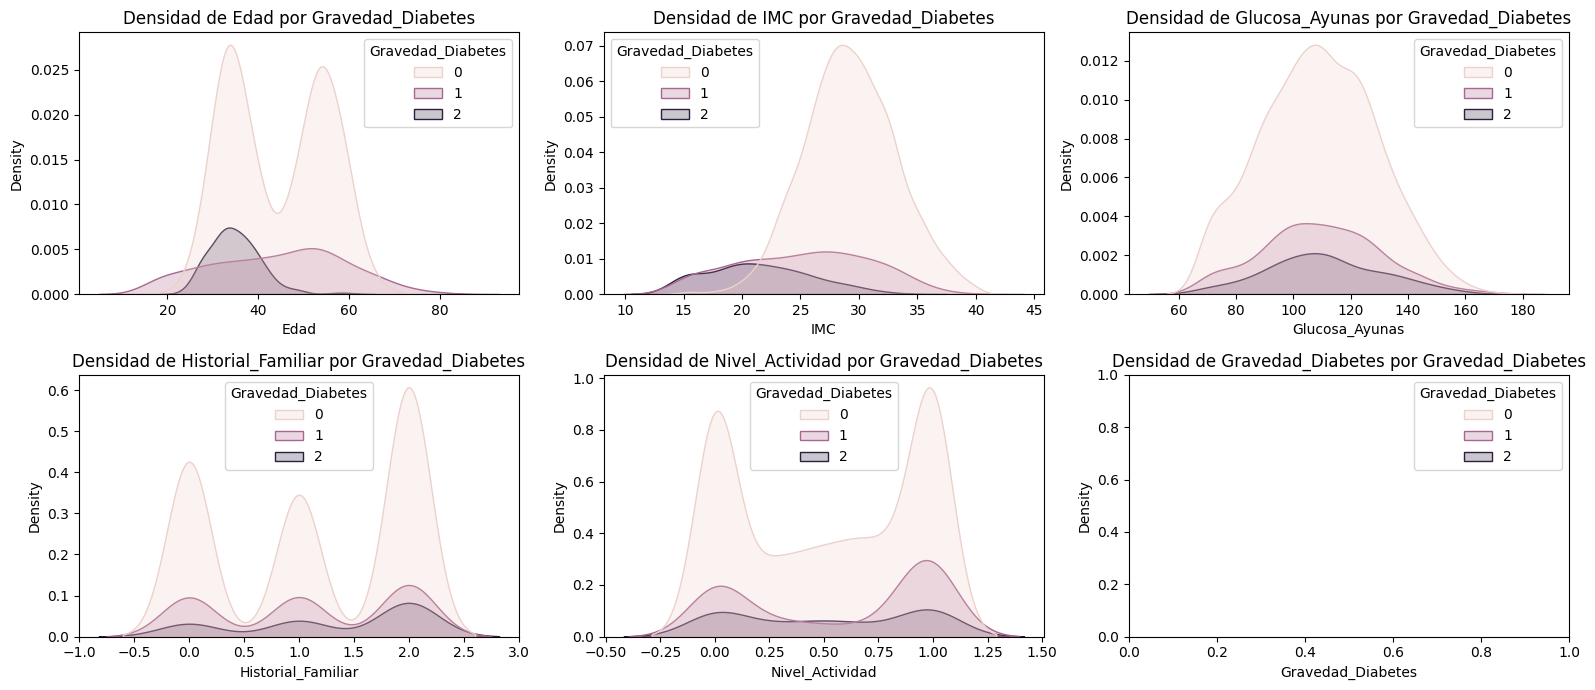

In [16]:
# Análisis Bivariado (Características vs. Objetivo).
# Se utiliza un análisis de densidad (KDE plot) para cada característica,
# segmentado por la variable objetivo. Esto nos permite comparar visualmente
# cómo las distribuciones de cada característica cambian
# para la Clase 0, Clase 1 y Clase 2.

analyzer.density_analysis(target_col="Gravedad_Diabetes", fig_size=(16, 7))

Aquí tienes un análisis de los gráficos de densidad por `Gravedad\_Diabetes`:

Estos gráficos muestran la distribución de probabilidad (densidad) de cada variable, separada por las tres clases de `Gravedad\_Diabetes`.

* **Edad**: La Clase 0 (Sin Diabetes) tiene una clara distribución bimodal, con dos grandes grupos de pacientes (picos alrededor de 35-40 y 50-55 años). Las Clases 1 y 2 tienen densidades mucho menores y están más distribuidas, sin picos tan definidos.
* **IMC**: La Clase 0 muestra un pico de densidad fuerte alrededor de un IMC de 28-30. Las Clases 1 (Moderada) y 2 (Severa) tienen distribuciones más planas y anchas, con picos en valores de IMC ligeramente más bajos.
* **Glucosa\_Ayunas**: Esta variable es un fuerte diferenciador. La Clase 0 tiene un pico muy alto y estrecho en niveles de glucosa más bajos (aprox. 100-110). En cambio, las Clases 1 y 2 tienen distribuciones mucho más planas y anchas, desplazadas hacia niveles de glucosa más altos.
* **Historial\_Familiar**: Siendo una variable discreta, los picos están en los valores 0, 1 y 2. Se puede ver que las tres clases tienen pacientes en las three categorías, aunque la Clase 0 es dominante en todas ellas (especialmente en 2.0).
* **Nivel\_Actividad**: La Clase 0 presenta una distribución en forma de "U", con la mayoría de los pacientes en los extremos (0.0 - sedentario o 1.0 - muy activo). Las Clases 1 y 2 también muestran esta tendencia, pero con una densidad mucho menor.
* **Gravedad\_Diabetes**: Este gráfico está vacío, ya que es la variable objetivo utilizada para segmentar los otros gráficos.

**Conclusión General:**

El tamaño relativo de las áreas (especialmente el rosa claro de la Clase 0) confirma visualmente el **fuerte desbalance de clases** en el dataset.value_counts()]. **Glucosa\_Ayunas** parece ser la variable individual más predictiva, ya que su distribución para la Clase 0 es notablemente diferente a la de las Clases 1 y 2.

## 1.6: Análisis de Correlación
Verifica las correlaciones entre las características para identificar posibles relaciones que puedan ser importantes en el análisis. Esto puede ayudar a reducir la multicolinealidad y seleccionar las características más relevantes.

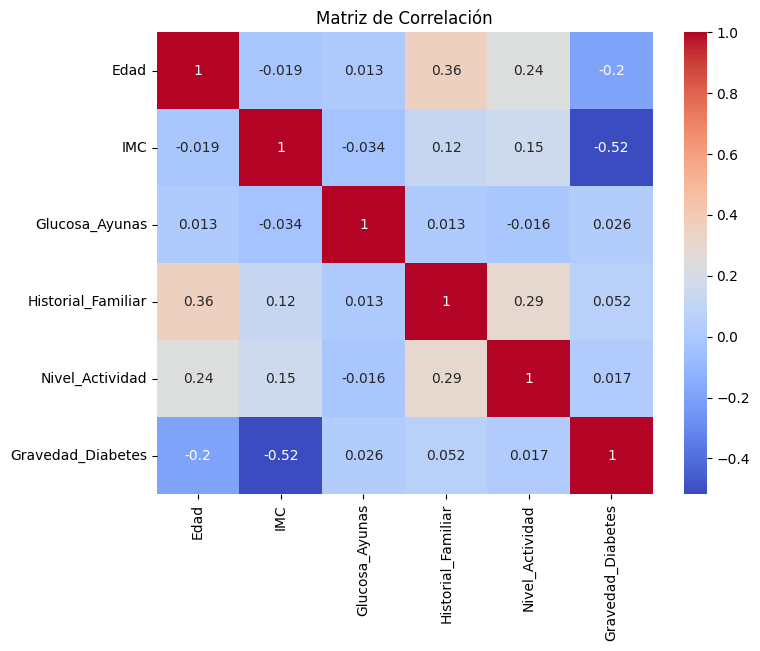

In [17]:
# Llama al método 'correlation_analysis' del objeto 'analyzer'.
# Esta función calcula la matriz de correlación (usualmente de Pearson) entre
# todas las variables numéricas del DataFrame.
# Luego, la visualiza como un 'heatmap' (mapa de calor), lo que facilita
# la identificación rápida de relaciones lineales fuertes (positivas o negativas) entre variables.
analyzer.correlation_analysis(fig_size=(8, 6))

**Análisis de la Matriz de Correlación**

La **matriz de correlación** muestra las relaciones lineales entre las diferentes características del dataset. Aquí se destacan las correlaciones significativas que pueden ser útiles para interpretar patrones en los datos:




## 1.7: Conclusiones del Análisis

1. **Distribuciones Asimétricas**: Las variables de ingreso anual y gasto promedio muestran distribuciones asimétricas, lo que indica que hay una minoría de clientes con ingresos y gastos significativamente más altos que el promedio.
2. **Valores Atípicos**: Se identificaron valores atípicos en el ingreso anual, gasto promedio y productos anteriores, lo que sugiere la presencia de clientes especiales que podrían requerir un análisis más detallado.
3. **Agrupaciones Claras**: La puntuación de interés y el nivel de interés muestran agrupaciones bien definidas, lo que podría ser útil para segmentar a los clientes y diseñar estrategias de marketing específicas.
4. **Variedad de Comportamientos**: El gasto promedio tiene una distribución multimodal, lo que sugiere que existen diferentes grupos de comportamiento de clientes con hábitos de gasto distintos.
5. **Correlaciones Clave**: Se identificaron correlaciones significativas entre el gasto promedio, la puntuación de interés y el nivel de interés, lo que sugiere que estos atributos podrían ser importantes para predecir el comportamiento del cliente.
6. **Relevancia de las Variables**: Algunas variables, como la edad, mostraron correlaciones bajas con otras características, lo que sugiere que su impacto en el comportamiento del cliente es limitado.

# 2. Preparación de los Datos

Antes de construir y evaluar modelos de clasificación, es importante preparar los datos para el análisis. Esto incluye la normalización de las características, la codificación de variables categóricas y la división del dataset en conjuntos de entrenamiento y prueba.

- Normalización de Características
- Remoción de Variables Redundantes
- División del Dataset

## 2.1: Normalización de Características

Dado que las características del dataset tienen diferentes escalas y rangos, es útil normalizarlas para que tengan una distribución más uniforme. Esto puede mejorar el rendimiento de los modelos de clasificación y facilitar la interpretación de los coeficientes.

In [18]:
df1_diabetes.head()

,Edad,IMC,Glucosa_Ayunas,Historial_Familiar,Nivel_Actividad,Gravedad_Diabetes
0,29,27.5,131,0,1.00,1
1,47,23.1,101,0,1.00,0
2,46,24.4,106,0,0.59,0
3,36,21.9,93,0,1.00,2
4,57,32.5,97,2,1.00,0


In [19]:
# Importa la clase 'MinMaxScaler' de la biblioteca scikit-learn.
from sklearn.preprocessing import MinMaxScaler

# Crea una instancia del escalador. MinMaxScaler escala los datos a un rango específico, por defecto [0, 1].
scaler = MinMaxScaler()

# Crea una copia del DataFrame original para no modificarlo.
df1_diabetes_scaled = df1_diabetes.copy()

# Lista de columnas que se van a escalar.
columns_to_scale = ["Edad", "IMC", "Glucosa_Ayunas", "Nivel_Actividad"]

# Aplica el escalado.
# .fit_transform() primero "aprende" los valores mínimos y máximos de las columnas (fit)
# y luego aplica la transformación (transform) para escalarlos al rango [0, 1].
df1_diabetes_scaled[columns_to_scale] = scaler.fit_transform(df1_diabetes[columns_to_scale])

# Muestra las estadísticas descriptivas del DataFrame escalado.
# Nótese cómo 'min' es 0.0 y 'max' es 1.0 para las columnas escaladas.
df1_diabetes_scaled.describe()

,Edad,IMC,Glucosa_Ayunas,Historial_Familiar,Nivel_Actividad,Gravedad_Diabetes
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.408677,0.509292,0.373414,1.145500,0.532215,0.408500
std,0.189293,0.204882,0.191808,0.847165,0.415054,0.671456
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.241935,0.387097,0.238095,0.000000,0.000000,0.000000
50%,0.370968,0.528226,0.371429,1.000000,0.590000,0.000000
75%,0.580645,0.653226,0.504762,2.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000


## 2.2: Remoción de Variables Redundantes

Para evitar la multicolinealidad y reducir la complejidad del modelo, es útil eliminar variables redundantes o altamente correlacionadas. En este caso, se eliminará la variable `Edad` y `Productos_Anteriores` debido a su baja correlación con las demás características.

In [20]:
# Elimina las columnas "Edad" y "Glucosa_Ayunas" del DataFrame escalado.
# 'inplace=True' modifica el DataFrame 'df1_diabetes_scaled' directamente.
# Esto se hace, como indica el markdown, para reducir la redundancia o porque
# el análisis de correlación (Celda 31) pudo mostrar que no eran tan relevantes.
df1_diabetes_scaled.drop(columns=["Edad", "Glucosa_Ayunas"], inplace=True)

# Muestra las primeras 5 filas del DataFrame resultante para verificar la eliminación.
df1_diabetes_scaled.head()

,IMC,Historial_Familiar,Nivel_Actividad,Gravedad_Diabetes
0,0.504032,0,1.00,1
1,0.326613,0,1.00,0
2,0.379032,0,0.59,0
3,0.278226,0,1.00,2
4,0.705645,2,1.00,0


## 2.4: División del Dataset

Para evaluar el rendimiento de los modelos de clasificación, es necesario dividir el dataset en conjuntos de entrenamiento y prueba. Esto permite entrenar los modelos en una parte de los datos y evaluar su rendimiento en una parte independiente. En este caso, se utilizará una proporción de 80% para entrenamiento y 20% para prueba.

In [21]:
# Importa la función 'train_test_split' de scikit-learn.
from sklearn.model_selection import train_test_split

# Separa las características (variables predictoras) de la variable objetivo.
# 'X' contiene todas las columnas EXCEPTO 'Gravedad_Diabetes'.
X = df1_diabetes_scaled.drop(columns=["Gravedad_Diabetes"])
# 'y' contiene ÚNICAMENTE la columna 'Gravedad_Diabetes'.
y = df1_diabetes_scaled["Gravedad_Diabetes"]

# Divide los datos 'X' e 'y' en conjuntos de entrenamiento y prueba.
# 'test_size=0.2' significa que el 20% de los datos se usará para la prueba (X_test, y_test)
# y el 80% restante para el entrenamiento (X_train, y_train).
# 'random_state=42' fija la semilla aleatoria para que la división sea reproducible.
# Cualquiera que ejecute este código con random_state=42 obtendrá la misma división.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprime las dimensiones (filas, columnas) de los conjuntos de datos resultantes
# para verificar que la división se realizó correctamente.
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((1600, 3), (400, 3), (1600,), (400,))

# 3. Construcción y Evaluación de Modelos

Se utilizará el modelo random forest para clasificar a los clientes en los tres niveles de interés. Luego, se evaluará el rendimiento del modelo utilizando métricas de clasificación comunes, como la matriz de confusión, la precisión, el recall, el F1-score.

In [22]:
# Importa el modelo de clasificación 'RandomForestClassifier' (Bosque Aleatorio).
from sklearn.ensemble import RandomForestClassifier

# Importa las funciones 'classification_report' y 'confusion_matrix'
# que se usarán para evaluar el rendimiento del modelo.
from sklearn.metrics import classification_report, confusion_matrix

## 3.1: Construcción del Modelo

In [23]:
# Crea una instancia del modelo RandomForestClassifier.
# Se utilizan los hiperparámetros por defecto (ej. 100 árboles).
rf_model = RandomForestClassifier()

# Entrena el modelo usando los datos de entrenamiento (X_train, y_train).
# El modelo "aprende" los patrones que relacionan las características con la gravedad de la diabetes.
rf_model.fit(X_train, y_train)

# Usa el modelo entrenado para hacer predicciones sobre el conjunto de prueba (X_test),
# que el modelo nunca ha visto antes.
y_pred = rf_model.predict(X_test)

## 3.2: Evaluación del Modelo

### 3.2.1: Matriz de Confusión

In [24]:
# Importa la biblioteca 'seaborn' (para gráficos estadísticos) y la renombra como 'sns'.
import seaborn as sns
# Importa 'matplotlib.pyplot' (para la visualización) y la renombra como 'plt'.
import matplotlib.pyplot as plt

# Define una función llamada 'plot_confusion_matrix' para visualizar la matriz de confusión.
# Acepta las etiquetas verdaderas (y_true), las predicciones (y_pred), los nombres de las etiquetas (labels),
# y un tamaño de figura opcional (figsize).
def plot_confusion_matrix(y_true, y_pred, labels: list, figsize=(8, 6)):
    # Calcula la matriz de confusión usando scikit-learn.
    cm = confusion_matrix(y_true, y_pred)

    # Crea una nueva figura de Matplotlib con el tamaño especificado.
    plt.figure(figsize=figsize)

    # Genera un mapa de calor (heatmap) usando seaborn.
    # 'cm' son los datos.
    # 'annot=True' muestra los números (anotaciones) en cada celda.
    # 'fmt="d"' formatea los números como enteros (dígitos).
    # 'cmap="Blues"' usa una paleta de colores azules.
    # 'xticklabels' y 'yticklabels' usan la lista 'labels' para los ejes X e Y.
    # 'cbar=False' oculta la barra de colores.
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=False)

    # Establece las etiquetas de los ejes y el título.
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')

    # Muestra el gráfico.
    plt.show()

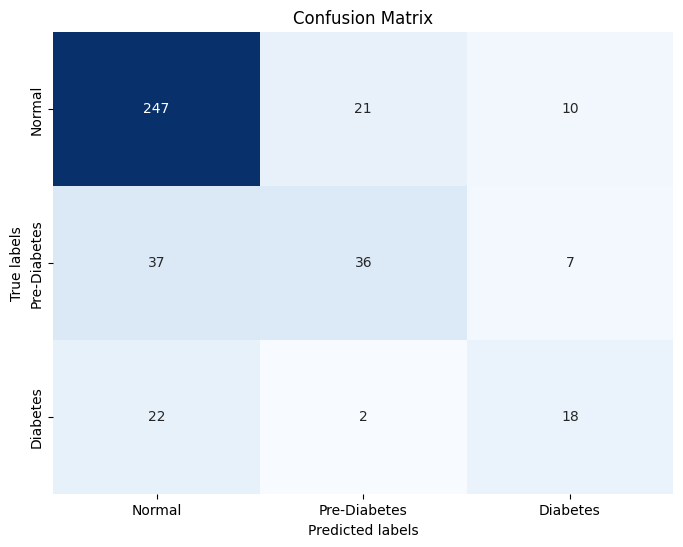

In [25]:
# Define los nombres de las clases (0, 1, 2) en el orden correcto.
labels = ["Normal", "Pre-Diabetes", "Diabetes"]

# Llama a la función que acabamos de definir para graficar la matriz de confusión.
# Compara las etiquetas reales del conjunto de prueba (y_test)
# con las etiquetas que predijo el modelo (y_pred).
conf_matrix = plot_confusion_matrix(y_test, y_pred, labels)

### 3.2.2: Reporte de Clasificación


In [26]:
# Imprime el reporte de clasificación.
# Esta función calcula automáticamente la precisión (precision), sensibilidad (recall),
# f1-score y el soporte (support - número de instancias) para cada clase.
# 'target_names=labels' usa los nombres de las clases que definimos para que el reporte sea legible.
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

      Normal       0.81      0.89      0.85       278
Pre-Diabetes       0.61      0.45      0.52        80
    Diabetes       0.51      0.43      0.47        42

    accuracy                           0.75       400
   macro avg       0.64      0.59      0.61       400
weighted avg       0.74      0.75      0.74       400



## 3.3: Interpretación de las Métricas

### 3.3.1: Interpretación de la Matriz de Confusión




### 3.3.2: Análisis del Reporte de Clasificación



# Pregruntas

1. ¿Por qué es importante considerar las métricas de clasificación en un dataset desbalanceado?
2. ¿Qué métricas son más adecuadas para evaluar el rendimiento de un modelo en un dataset desbalanceado?
3. ¿Cómo se pueden interpretar las métricas de precisión, recall y F1-score en el contexto de un problema de clasificación?
4. ¿Qué estrategias se pueden utilizar para mejorar el rendimiento de un modelo en un dataset desbalanceado?
5. ¿Qué metodologías se podrían aplicar para mejorar el modelo actual, considerando las limitaciones del dataset?
   1. (pista: ajuste de hiperparámetros, selección de características, etc.)
6. **¿Podría confiar en el resultado del modelo actual despues de haberlo entrenado una sola vez?**

# Consistencia del Modelo

In [27]:
# Importa la función 'accuracy_score' para medir la precisión general.
from sklearn.metrics import accuracy_score
# Importa la biblioteca 'numpy' para cálculos numéricos (media, std).
import numpy as np

# Inicializa una lista vacía para guardar los puntajes de precisión de cada ejecución.
accuracy_scores = []

# Inicia un bucle que se ejecutará 5 veces (para i = 0, 1, 2, 3, 4).
for i in range(5):
    # Divide los datos nuevamente. 'random_state=i' asegura que cada división sea diferente.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Crea una NUEVA instancia del modelo en cada iteración.
    rf_model = RandomForestClassifier()

    # Entrena el nuevo modelo con el nuevo conjunto de datos de entrenamiento.
    rf_model.fit(X_train, y_train)

    # Realiza predicciones en el nuevo conjunto de prueba.
    y_pred = rf_model.predict(X_test)

    # Calcula la precisión (accuracy) de esta ejecución y la añade a la lista.
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Calcula la precisión promedio (media) de las 5 ejecuciones.
avg_accuracy = np.mean(accuracy_scores)
# Calcula la desviación estándar de las 5 precisiones.
std_accuracy = np.std(accuracy_scores)

# Imprime el resultado final, mostrando la precisión promedio y su variabilidad (desviación estándar).
# Esto nos da una idea de qué tan estable (consistente) es el rendimiento del modelo.
print(f"Average accuracy: {avg_accuracy:.2f} +/- {std_accuracy:.2f}")


Average accuracy: 0.79 +/- 0.01
